In [ ]:
# modules
import pandas as pd
import json
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

#JSON to DataFrame



In [ ]:
# mount the colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# json to dataframe
data_path = "/content/drive/MyDrive/Soccer_data_raw/soccer/EPL/2018/2781950-2018-08-12.json"

with open(data_path, 'r') as json_file:
    json_data = json.load(json_file)


In [ ]:
json_data

{'info': {'matchId': '2781950',
  'leagueName': 'Premier League',
  'matchDateTime': '2018-08-12T15:00:00.000Z',
  'stadium': {'name': 'Emirates Stadium', 'country': ''}},
 'homeTeam': {'name': 'Arsenal',
  'id': 9825,
  'lineup': [{'id': '30859',
    'position': 'Keeper',
    'localizedPosition': {'label': 'GK', 'key': 'keeper'},
    'name': {'firstName': 'Petr', 'lastName': 'Cech', 'fullName': 'Petr Cech'},
    'role': 'Keeper',
    'stats': {'shotsOnTarget': 0,
     'minutesPlayed': 90,
     'saves': 6,
     'goalsConceded': 2,
     'passesAttempted': 42,
     'passesCompleted': 31,
     'longBallsAttempted': 17,
     'longBallsCompleted': 7,
     'keeperDivingSave': 5,
     'savesInsideBox': 4,
     'keeperSweeper': 0,
     'punches': 0,
     'playerThrows': 6,
     'keeperHighClaim': 0,
     'recoveries': 9,
     'touches': 56}},
   {'id': '427438',
    'position': 'Defender',
    'localizedPosition': {'label': 'RB', 'key': 'rightback_short'},
    'name': {'firstName': 'Hector',
 

In [ ]:
json_data['homeTeam'].keys()


dict_keys(['name', 'id', 'lineup', 'bench', 'coach', 'stats'])

In [ ]:
def json_to_dataframe(json_data):
  # homeTeam
  df0 = pd.json_normalize(json_data['homeTeam'],record_path=['lineup'])
  df0.PlayerStatus = 'Player'

  df1 = pd.json_normalize(json_data['homeTeam'],record_path=['bench'])
  df1.PlayerStatus = 'Bench'

  result_df = pd.concat([df0, df1], axis=0, ignore_index=True)
  # matchId
  result_df['match.id'] = json_data['info']['matchId']
  # league name
  result_df['leagueName'] = json_data['info']['leagueName']
  # stadium
  result_df['stadium'] = json_data['info']['stadium']['name']
  # team
  result_df['team.name'] = json_data['homeTeam']['name']
  # team
  result_df['team.id'] = json_data['homeTeam']['id']
  result_df['team.type'] = 'homeTeam'

  #awayTeam
  df2 = pd.json_normalize(json_data['awayTeam'],record_path=['lineup'])
  df2.PlayerStatus = 'Player'

  df3 = pd.json_normalize(json_data['awayTeam'],record_path=['bench'])
  df3.PlayerStatus = 'Bench'

  result_df_away = pd.concat([df2, df3], axis=0, ignore_index=True)
  # matchId
  result_df_away['match.id'] = json_data['info']['matchId']
  # league name
  result_df_away['leagueName'] = json_data['info']['leagueName']
  # stadium
  result_df_away['stadium'] = json_data['info']['stadium']['name']

  # team
  result_df_away['team.name'] = json_data['awayTeam']['name']
  # team
  result_df_away['team.id'] = json_data['awayTeam']['id']
  result_df_away['team.type'] = 'awayTeam'

  final_df = pd.concat([result_df, result_df_away], axis=0, ignore_index=True)

#   desired_order = [
#     'match.id', 'leagueName', 'stadium', 'team.name', 'team.id',
#     'name.firstName', 'name.lastName', 'name.fullName', 'id', 'position', 'role',
#     'localizedPosition.label', 'localizedPosition.key', 'stats.shotsOnTarget',
#     'stats.minutesPlayed', 'stats.saves', 'stats.goalsConceded', 'stats.passesAttempted',
#     'stats.passesCompleted', 'stats.longBallsAttempted', 'stats.longBallsCompleted',
#     'stats.keeperDivingSave', 'stats.savesInsideBox', 'stats.keeperSweeper',
#     'stats.punches', 'stats.playerThrows', 'stats.keeperHighClaim', 'stats.recoveries',
#     'stats.touches', 'stats.goals', 'stats.assists', 'stats.totalShots', 'stats.chancesCreated',
#     'stats.dribblesAttempted', 'stats.dribblesCompleted', 'stats.dispossessed', 'stats.tacklesAttempted',
#     'stats.tacklesCompleted', 'stats.shotBlocks', 'stats.clearances', 'stats.headedClearance',
#     'stats.interceptions', 'stats.groundDuelsAttempted', 'stats.groundDuelsCompleted',
#     'stats.aerialsAttempted', 'stats.aerialsCompleted', 'stats.wasFouled', 'stats.fouls',
#     'stats.passesIntoFinalThird', 'stats.dribbledPast', 'stats.crossesAttempted', 'stats.crossesCompleted',
#     'stats.corners', 'stats.offsides', 'stats.blockedShots', 'localizedPosition', 'stats.bigChanceMissedTitle'
# ]
#   final_df = final_df[desired_order]
  return final_df

In [ ]:
x = json_to_dataframe(json_data)

In [ ]:
x.shape

(36, 58)

In [ ]:
x

,id,position,role,localizedPosition.label,localizedPosition.key,name.firstName,name.lastName,name.fullName,stats.shotsOnTarget,stats.minutesPlayed,...,stats.offsides,stats.blockedShots,localizedPosition,stats.bigChanceMissedTitle,match.id,leagueName,stadium,team.name,team.id,team.type
0,30859,Keeper,Keeper,GK,keeper,Petr,Cech,Petr Cech,0,90.0,...,NaN,NaN,NaN,NaN,2781950,Premier League,Emirates Stadium,Arsenal,9825,homeTeam
1,427438,Defender,Defender,RB,rightback_short,Hector,Bellerin,Hector Bellerin,1,90.0,...,NaN,NaN,NaN,NaN,2781950,Premier League,Emirates Stadium,Arsenal,9825,homeTeam
2,184999,Defender,Defender,CB,centerback_short,Shkodran,Mustafi,Shkodran Mustafi,1,90.0,...,NaN,NaN,NaN,NaN,2781950,Premier League,Emirates Stadium,Arsenal,9825,homeTeam
3,39455,Defender,Defender,CB,centerback_short,Sokratis,Papastathopoulos,Sokratis Papastathopoulos,0,90.0,...,NaN,NaN,NaN,NaN,2781950,Premier League,Emirates Stadium,Arsenal,9825,homeTeam
4,604089,Defender,Defender,LB,leftback_short,Ainsley,Maitland-Niles,Ainsley Maitland-Niles,0,35.0,...,NaN,NaN,NaN,NaN,2781950,Premier League,Emirates Stadium,Arsenal,9825,homeTeam
5,800609,Midfielder,Midfielder,DM,centerdefensivemidfielder_short,Matteo,Guendouzi,Matteo Guendouzi,0,90.0,...,NaN,NaN,NaN,NaN,2781950,Premier League,Emirates Stadium,Arsenal,9825,homeTeam
6,207236,Midfielder,Midfielder,DM,centerdefensivemidfielder_short,Granit,Xhaka,Granit Xhaka,0,70.0,...,NaN,NaN,NaN,NaN,2781950,Premier League,Emirates Stadium,Arsenal,9825,homeTeam
7,36378,Midfielder,Midfielder,RW,rightwinger_short,Mesut,Özil,Mesut Özil,0,90.0,...,2.0,NaN,NaN,NaN,2781950,Premier League,Emirates Stadium,Arsenal,9825,homeTeam
8,75489,Midfielder,Midfielder,AM,centerattackingmidfielder_short,Aaron,Ramsey,Aaron Ramsey,1,54.0,...,2.0,NaN,NaN,NaN,2781950,Premier League,Emirates Stadium,Arsenal,9825,homeTeam
9,73167,Midfielder,Midfielder,LW,leftwinger_short,Henrikh,Mkhitaryan,Henrikh Mkhitaryan,0,90.0,...,NaN,2.0,NaN,NaN,2781950,Premier League,Emirates Stadium,Arsenal,9825,homeTeam


In [ ]:
#concatinatin all json's into dataframe and merging all dataframes
def concat_json_files_in_folders(folder_path, years, file_extensions=['json']):
    result_dfs = []  # To store DataFrames from each JSON file

    for year in years:
        year_folder_path = os.path.join(folder_path, str(year))
        print(year_folder_path)

        # Check if the year folder exists
        if os.path.exists(year_folder_path) and os.path.isdir(year_folder_path):
            for file_extension in file_extensions:
                json_files = glob.glob(os.path.join(year_folder_path, f"*.{file_extension}"))
                # Create an empty DataFrame to store data for the current year
                year_df = pd.DataFrame()

                # Loop through JSON files in the year folder
                for json_file in json_files:
                  with open(json_file, 'r') as json_file_data:
                    json_data = json.load(json_file_data)
                    df = json_to_dataframe(json_data)
                    year_df = pd.concat([year_df, df], ignore_index=True)

                # Append the DataFrame for the current year to the result_dfs list
                result_dfs.append(year_df)

    # Concatenate the DataFrames from different years into a single DataFrame
    final_result_df = pd.concat(result_dfs, axis=0, ignore_index=True)

    #final_result_df = final_result_df[desired_order]

    return final_result_df


In [ ]:
year_folder_path = "/content/drive/MyDrive/Soccer_data_raw/soccer/EPL"
years = [2016,2017, 2018, 2019, 2020, 2021]

In [ ]:
result_df = concat_json_files_in_folders(year_folder_path, years)

/content/drive/MyDrive/Soccer_data_raw/soccer/EPL/2016
/content/drive/MyDrive/Soccer_data_raw/soccer/EPL/2017
/content/drive/MyDrive/Soccer_data_raw/soccer/EPL/2018
/content/drive/MyDrive/Soccer_data_raw/soccer/EPL/2019
/content/drive/MyDrive/Soccer_data_raw/soccer/EPL/2020
/content/drive/MyDrive/Soccer_data_raw/soccer/EPL/2021


In [ ]:
len(result_df.columns)

69

In [ ]:
result_df

,id,position,role,localizedPosition.label,localizedPosition.key,name.firstName,name.lastName,name.fullName,stats.shotsOnTarget,stats.minutesPlayed,...,stats.missedPenalty,stats.concededPenalties,stats.savedPenalties,stats.owngoal,stats.errorLedToGoal,stats.errorsLedToGoal,stats.clearanceOffTheLine,stats.lastManTackle,stats.penaltyGoalsConceded,stats.crosses
0,37770,Keeper,Keeper,GK,keeper,Kasper,Schmeichel,Kasper Schmeichel,0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23571,Defender,Defender,CB,centerback_short,Wes,Morgan,Wes Morgan,0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38899,Defender,Defender,CB,centerback_short,Robert,Huth,Robert Huth,0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43061,Defender,Defender,CB,centerback_short,Christian,Fuchs,Christian Fuchs,1,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,139671,Midfielder,Attacker,RM,rightmidfielder_short,Marc,Albrighton,Marc Albrighton,0,77.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84863,820024,Substitute,Midfielder,NaN,NaN,Sean,Longstaff,Sean Longstaff,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84864,189982,Substitute,Defender,NaN,NaN,Fabian,Schär,Fabian Schär,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84865,864983,Substitute,Defender,NaN,NaN,Jamal,Lewis,Jamal Lewis,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84866,299984,Substitute,Defender,NaN,NaN,Javier,Manquillo,Javier Manquillo,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
result_df.to_csv("soccer_prediction.csv",index=False)

In [ ]:
year_folder_path = "/content/drive/MyDrive/Soccer_data_raw/soccer/EPL"
years = [2022]

In [ ]:
future_df = concat_json_files_in_folders(year_folder_path, years)

/content/drive/MyDrive/Soccer_data_raw/soccer/EPL/2022


In [ ]:
result_df.to_csv("soccer_prediction_holdout.csv",index=False)

#Data Cleaning

In [ ]:
result_df = pd.read_csv("soccer_prediction.csv")

In [ ]:
# filling stats with 0
columns_to_replace = [col for col in result_df.columns if 'stats.' in col]

result_df[columns_to_replace] = result_df[columns_to_replace].fillna(0)


In [ ]:
result_df

,id,position,role,localizedPosition.label,localizedPosition.key,name.firstName,name.lastName,name.fullName,stats.shotsOnTarget,stats.minutesPlayed,...,stats.missedPenalty,stats.concededPenalties,stats.savedPenalties,stats.owngoal,stats.errorLedToGoal,stats.errorsLedToGoal,stats.clearanceOffTheLine,stats.lastManTackle,stats.penaltyGoalsConceded,stats.crosses
0,37770,Keeper,Keeper,GK,keeper,Kasper,Schmeichel,Kasper Schmeichel,0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23571,Defender,Defender,CB,centerback_short,Wes,Morgan,Wes Morgan,0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38899,Defender,Defender,CB,centerback_short,Robert,Huth,Robert Huth,0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,43061,Defender,Defender,CB,centerback_short,Christian,Fuchs,Christian Fuchs,1,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,139671,Midfielder,Attacker,RM,rightmidfielder_short,Marc,Albrighton,Marc Albrighton,0,77.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84863,820024,Substitute,Midfielder,NaN,NaN,Sean,Longstaff,Sean Longstaff,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84864,189982,Substitute,Defender,NaN,NaN,Fabian,Schär,Fabian Schär,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84865,864983,Substitute,Defender,NaN,NaN,Jamal,Lewis,Jamal Lewis,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84866,299984,Substitute,Defender,NaN,NaN,Javier,Manquillo,Javier Manquillo,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
result_df[['localizedPosition.label','localizedPosition.key']] = result_df[['localizedPosition.label','localizedPosition.key']].fillna('NONE')

In [ ]:
result_df

,id,position,role,localizedPosition.label,localizedPosition.key,name.firstName,name.lastName,name.fullName,stats.shotsOnTarget,stats.minutesPlayed,...,stats.missedPenalty,stats.concededPenalties,stats.savedPenalties,stats.owngoal,stats.errorLedToGoal,stats.errorsLedToGoal,stats.clearanceOffTheLine,stats.lastManTackle,stats.penaltyGoalsConceded,stats.crosses
0,37770,Keeper,Keeper,GK,keeper,Kasper,Schmeichel,Kasper Schmeichel,0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23571,Defender,Defender,CB,centerback_short,Wes,Morgan,Wes Morgan,0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38899,Defender,Defender,CB,centerback_short,Robert,Huth,Robert Huth,0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,43061,Defender,Defender,CB,centerback_short,Christian,Fuchs,Christian Fuchs,1,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,139671,Midfielder,Attacker,RM,rightmidfielder_short,Marc,Albrighton,Marc Albrighton,0,77.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84863,820024,Substitute,Midfielder,NONE,NONE,Sean,Longstaff,Sean Longstaff,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84864,189982,Substitute,Defender,NONE,NONE,Fabian,Schär,Fabian Schär,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84865,864983,Substitute,Defender,NONE,NONE,Jamal,Lewis,Jamal Lewis,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84866,299984,Substitute,Defender,NONE,NONE,Javier,Manquillo,Javier Manquillo,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(result_df['match.id'].unique())

2280

In [ ]:
result_df.isnull().any()

id                            False
position                      False
role                          False
localizedPosition.label       False
localizedPosition.key         False
                              ...  
stats.errorsLedToGoal         False
stats.clearanceOffTheLine     False
stats.lastManTackle           False
stats.penaltyGoalsConceded    False
stats.crosses                 False
Length: 69, dtype: bool

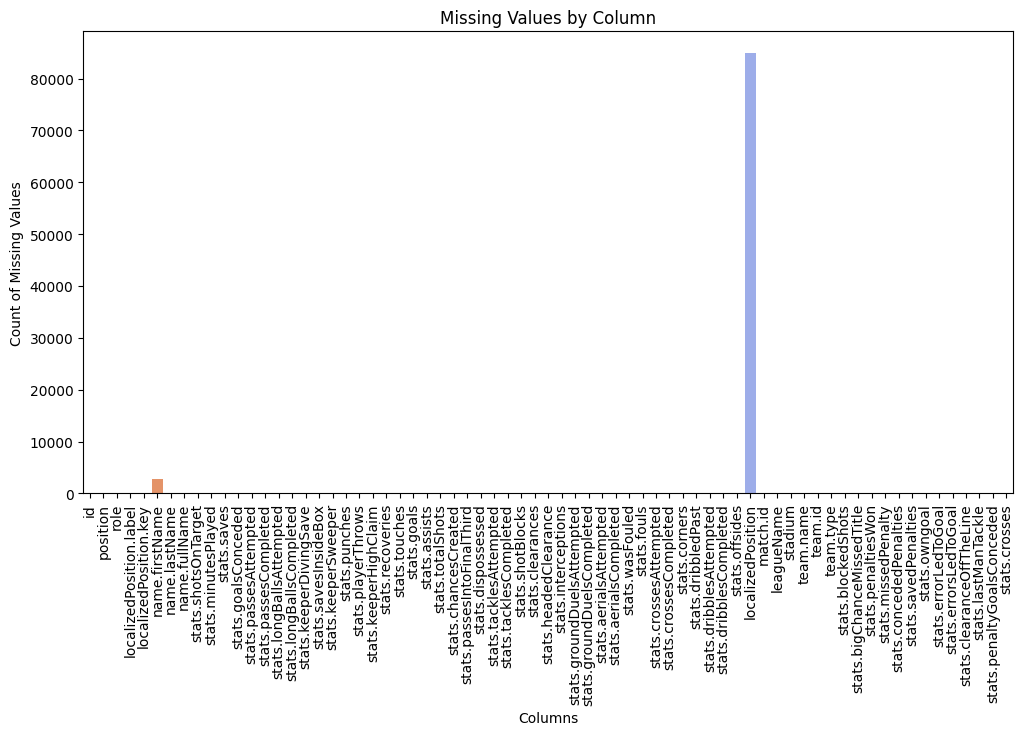

In [ ]:

missing_values = result_df.isnull().sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values by Column')
plt.show()


In [ ]:
result_df.drop(['localizedPosition','name.firstName','name.lastName'],axis=1,inplace=True)

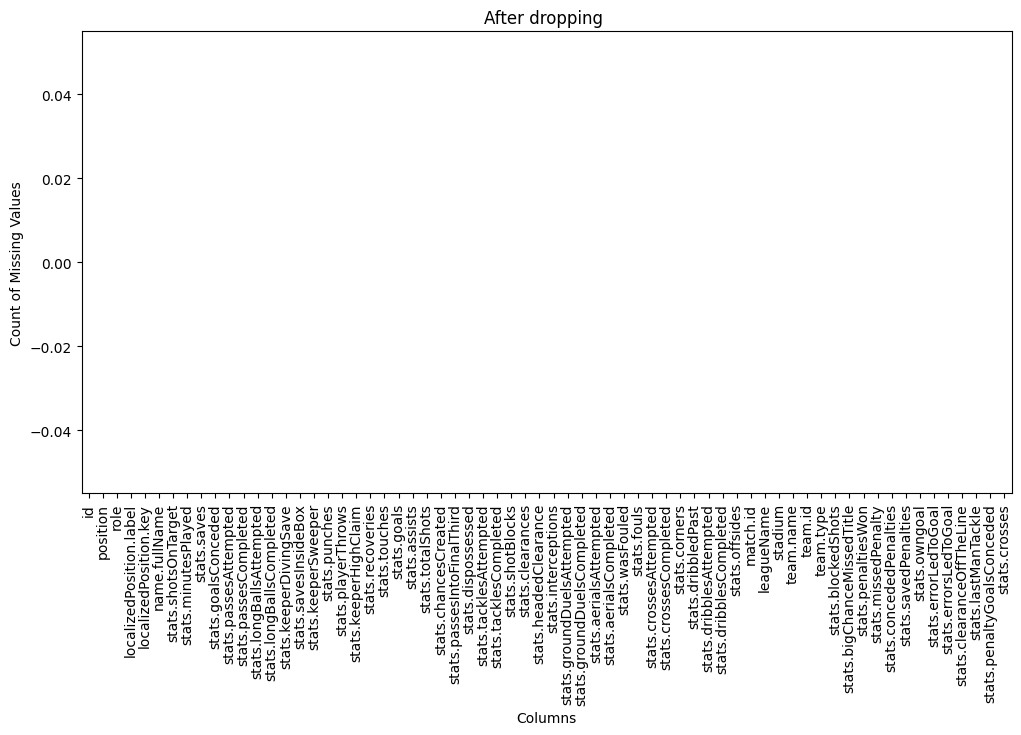

In [ ]:

missing_values = result_df.isnull().sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('After dropping ')
plt.show()


In [ ]:
result_df['localizedPosition.key'].unique()

array(['keeper', 'centerback_short', 'rightmidfielder_short',
       'centermidfielder_short', 'leftmidfielder_short',
       'centerforward_short', 'NONE', 'leftwinger_short',
       'rightwinger_short', 'rightback_short', 'leftback_short',
       'striker_short', 'centerattackingmidfielder_short',
       'centerdefensivemidfielder_short'], dtype=object)

All null values are removed

In [ ]:
result_df.to_csv("soccer_prediciton_cleaned.csv")

# Data preprocessing


In [ ]:
result_df

,id,position,role,localizedPosition.label,localizedPosition.key,name.fullName,stats.shotsOnTarget,stats.minutesPlayed,stats.saves,stats.goalsConceded,...,stats.missedPenalty,stats.concededPenalties,stats.savedPenalties,stats.owngoal,stats.errorLedToGoal,stats.errorsLedToGoal,stats.clearanceOffTheLine,stats.lastManTackle,stats.penaltyGoalsConceded,stats.crosses
0,37770,Keeper,Keeper,GK,keeper,Kasper Schmeichel,0,90.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23571,Defender,Defender,CB,centerback_short,Wes Morgan,0,90.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38899,Defender,Defender,CB,centerback_short,Robert Huth,0,60.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,43061,Defender,Defender,CB,centerback_short,Christian Fuchs,1,90.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,139671,Midfielder,Attacker,RM,rightmidfielder_short,Marc Albrighton,0,77.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84863,820024,Substitute,Midfielder,NONE,NONE,Sean Longstaff,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84864,189982,Substitute,Defender,NONE,NONE,Fabian Schär,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84865,864983,Substitute,Defender,NONE,NONE,Jamal Lewis,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84866,299984,Substitute,Defender,NONE,NONE,Javier Manquillo,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
result_df.columns

Index(['id', 'position', 'role', 'localizedPosition.label',
       'localizedPosition.key', 'name.fullName', 'stats.shotsOnTarget',
       'stats.minutesPlayed', 'stats.saves', 'stats.goalsConceded',
       'stats.passesAttempted', 'stats.passesCompleted',
       'stats.longBallsAttempted', 'stats.longBallsCompleted',
       'stats.keeperDivingSave', 'stats.savesInsideBox', 'stats.keeperSweeper',
       'stats.punches', 'stats.playerThrows', 'stats.keeperHighClaim',
       'stats.recoveries', 'stats.touches', 'stats.goals', 'stats.assists',
       'stats.totalShots', 'stats.chancesCreated',
       'stats.passesIntoFinalThird', 'stats.dispossessed',
       'stats.tacklesAttempted', 'stats.tacklesCompleted', 'stats.shotBlocks',
       'stats.clearances', 'stats.headedClearance', 'stats.interceptions',
       'stats.groundDuelsAttempted', 'stats.groundDuelsCompleted',
       'stats.aerialsAttempted', 'stats.aerialsCompleted', 'stats.wasFouled',
       'stats.fouls', 'stats.crossesAttempte

In [ ]:
#categorical : position,role, localizedPosition.label,localizedPosition.key
result_df.drop(['localizedPosition.label'],axis=1,inplace=True)

In [ ]:
result_df.columns

Index(['id', 'position', 'role', 'localizedPosition.label',
       'localizedPosition.key', 'name.fullName', 'stats.shotsOnTarget',
       'stats.minutesPlayed', 'stats.saves', 'stats.goalsConceded',
       'stats.passesAttempted', 'stats.passesCompleted',
       'stats.longBallsAttempted', 'stats.longBallsCompleted',
       'stats.keeperDivingSave', 'stats.savesInsideBox', 'stats.keeperSweeper',
       'stats.punches', 'stats.playerThrows', 'stats.keeperHighClaim',
       'stats.recoveries', 'stats.touches', 'stats.goals', 'stats.assists',
       'stats.totalShots', 'stats.chancesCreated',
       'stats.passesIntoFinalThird', 'stats.dispossessed',
       'stats.tacklesAttempted', 'stats.tacklesCompleted', 'stats.shotBlocks',
       'stats.clearances', 'stats.headedClearance', 'stats.interceptions',
       'stats.groundDuelsAttempted', 'stats.groundDuelsCompleted',
       'stats.aerialsAttempted', 'stats.aerialsCompleted', 'stats.wasFouled',
       'stats.fouls', 'stats.crossesAttempte

In [ ]:
df = pd.get_dummies(result_df,columns=['position','role','localizedPosition.key'])

In [ ]:
df

,id,name.fullName,stats.shotsOnTarget,stats.minutesPlayed,stats.saves,stats.goalsConceded,stats.passesAttempted,stats.passesCompleted,stats.longBallsAttempted,stats.longBallsCompleted,...,localizedPosition.key_centerforward_short,localizedPosition.key_centermidfielder_short,localizedPosition.key_keeper,localizedPosition.key_leftback_short,localizedPosition.key_leftmidfielder_short,localizedPosition.key_leftwinger_short,localizedPosition.key_rightback_short,localizedPosition.key_rightmidfielder_short,localizedPosition.key_rightwinger_short,localizedPosition.key_striker_short
0,37770,Kasper Schmeichel,0,90.0,0.0,3.0,26.0,11.0,25.0,10.0,...,0,0,1,0,0,0,0,0,0,0
1,23571,Wes Morgan,0,90.0,0.0,0.0,32.0,25.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,38899,Robert Huth,0,60.0,0.0,0.0,17.0,13.0,4.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,43061,Christian Fuchs,1,90.0,0.0,0.0,37.0,25.0,7.0,4.0,...,0,0,0,0,0,0,0,0,0,0
4,139671,Marc Albrighton,0,77.0,0.0,0.0,35.0,15.0,13.0,1.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84863,820024,Sean Longstaff,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
84864,189982,Fabian Schär,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
84865,864983,Jamal Lewis,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
84866,299984,Javier Manquillo,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


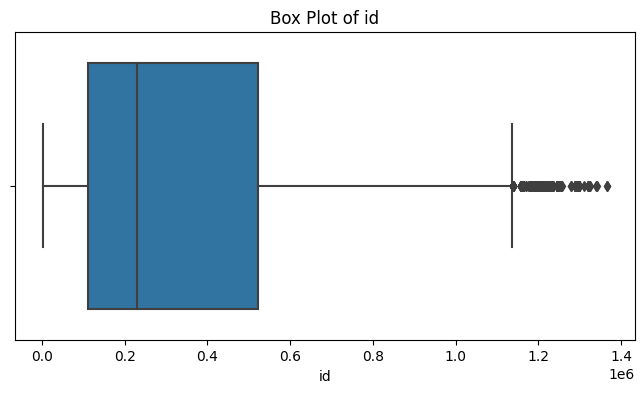

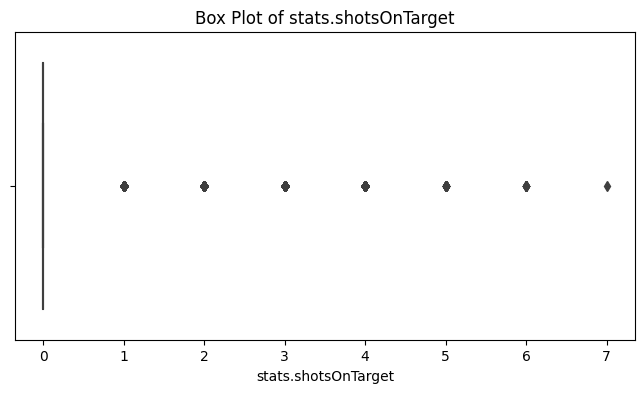

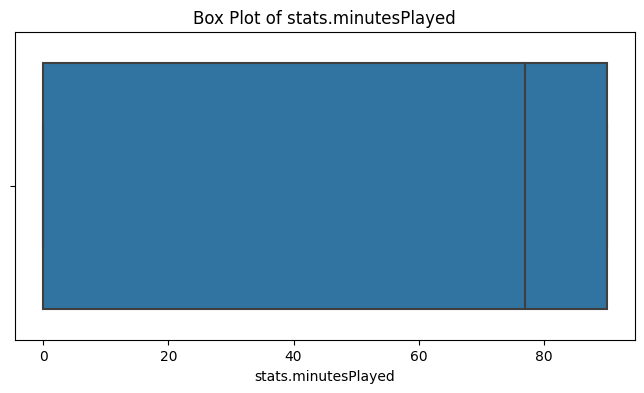

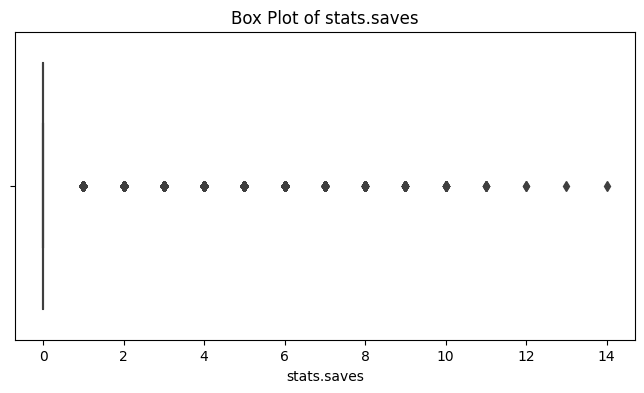

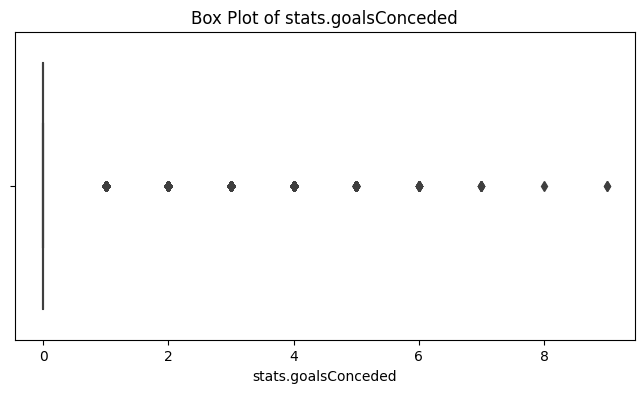

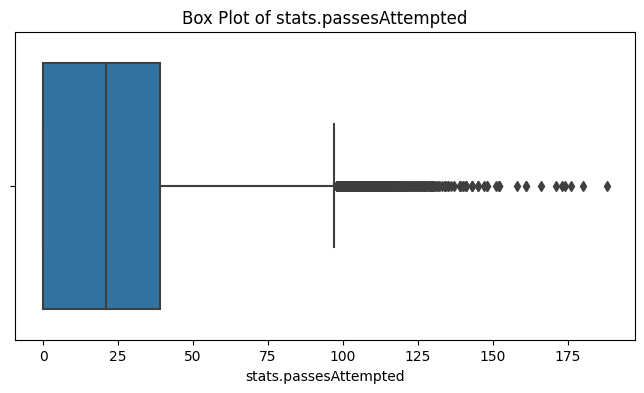

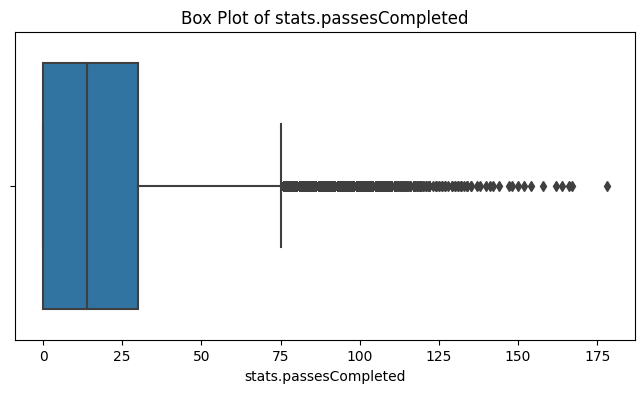

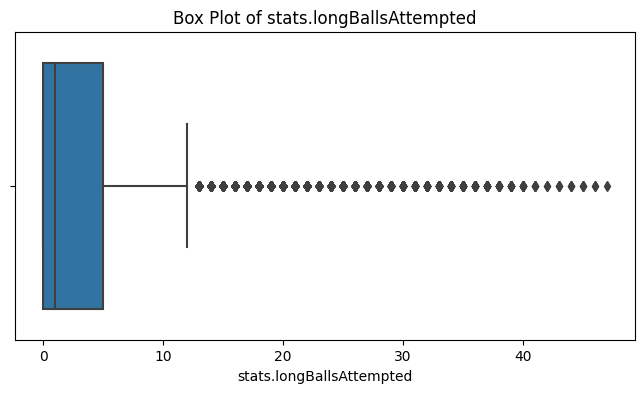

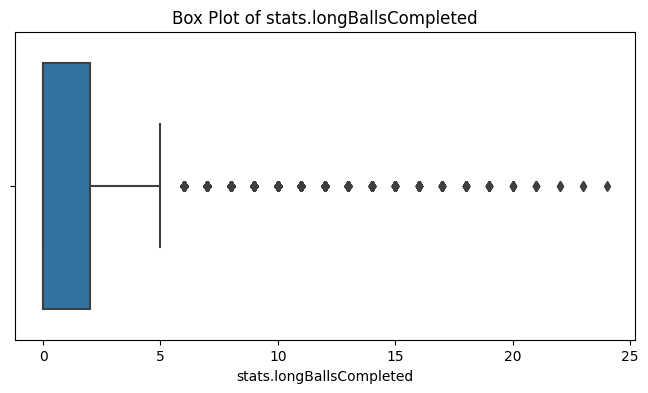

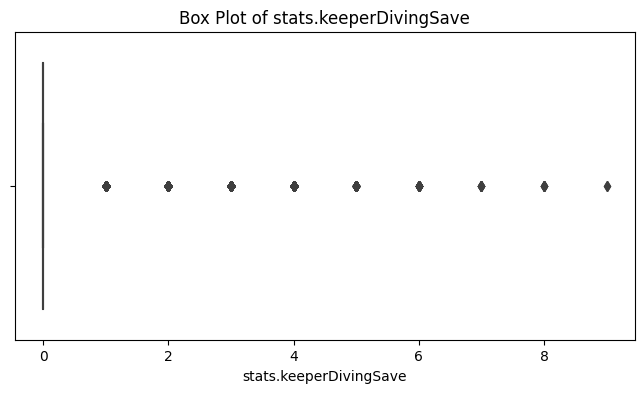

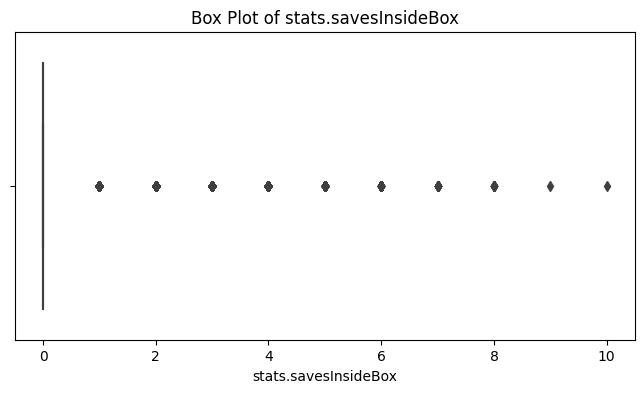

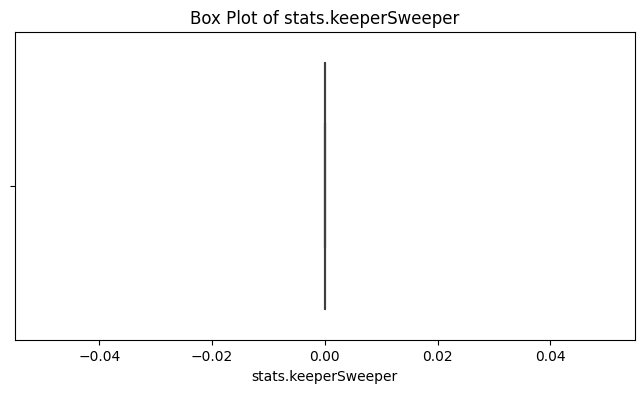

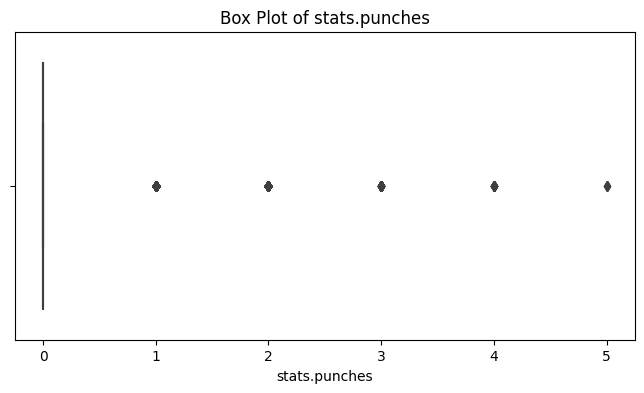

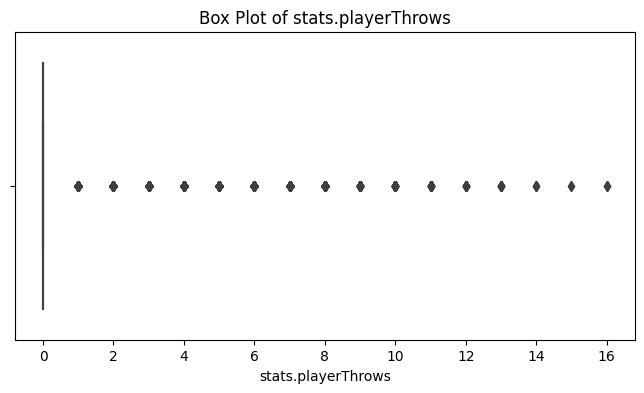

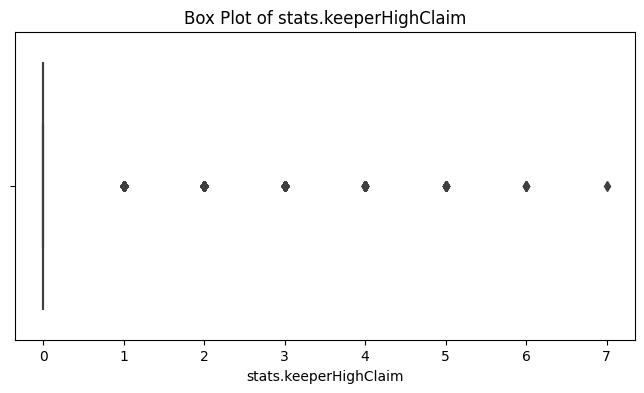

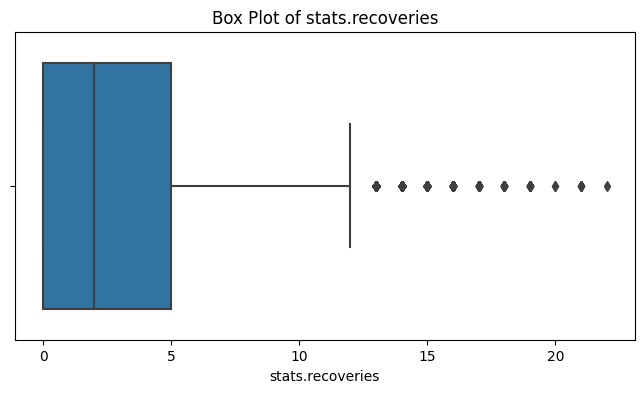

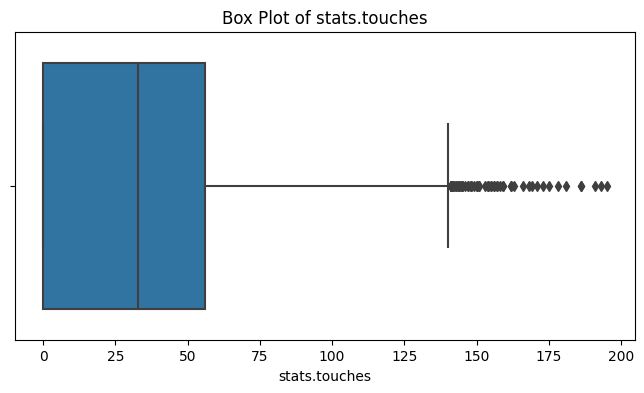

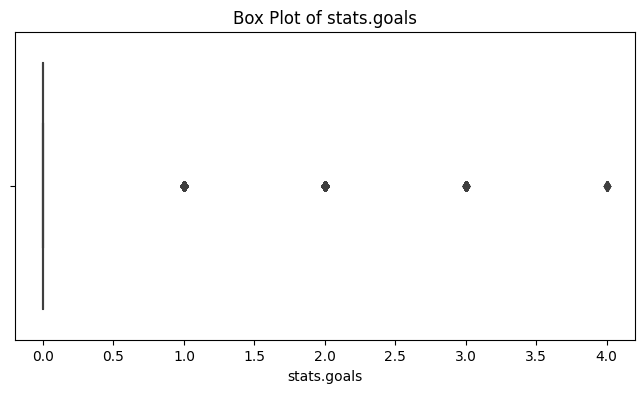

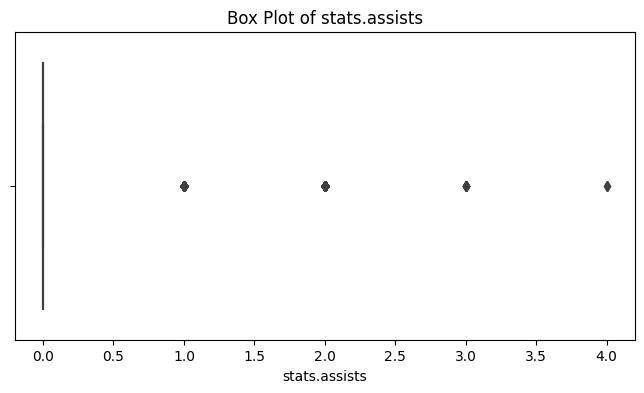

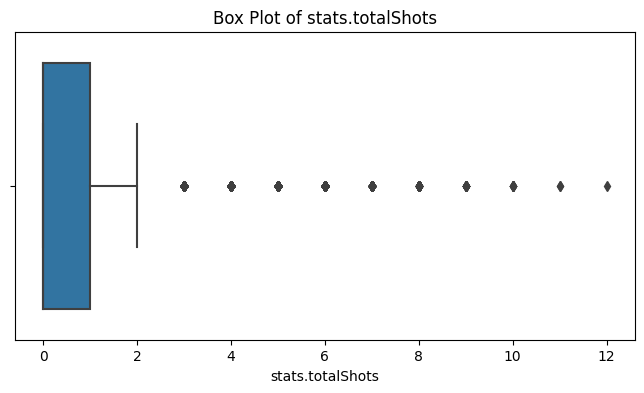

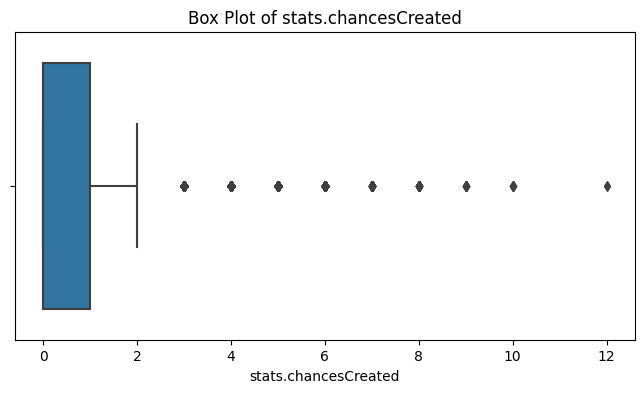

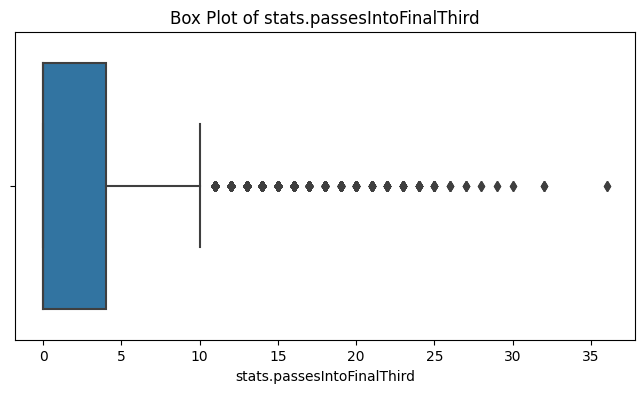

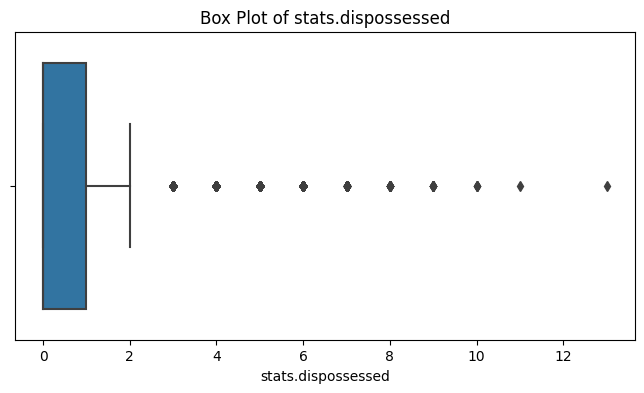

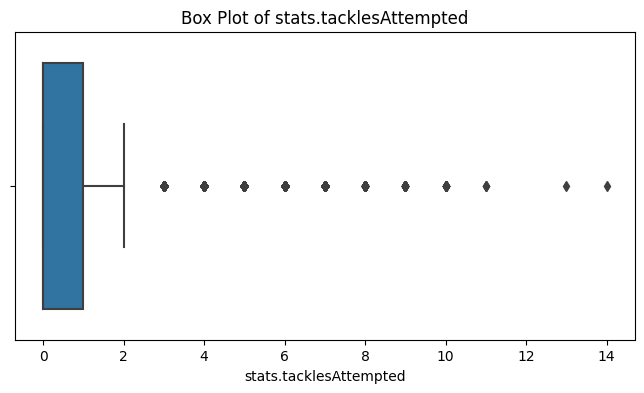

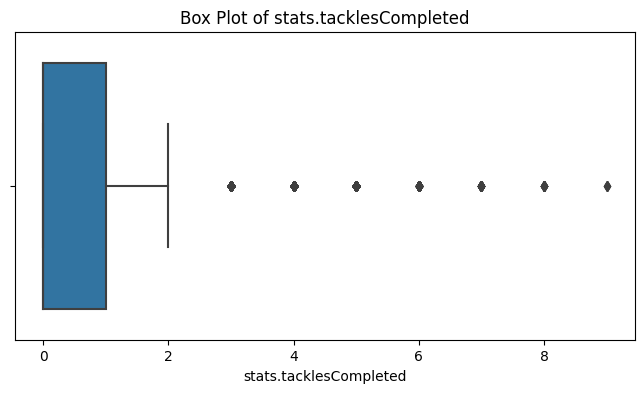

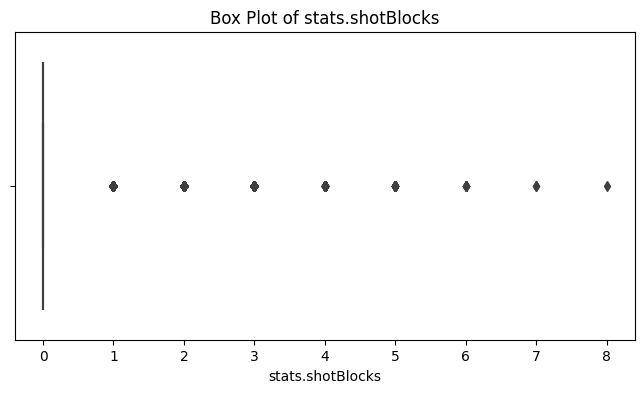

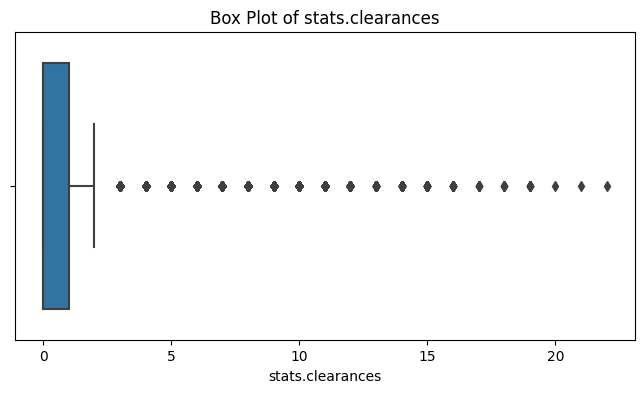

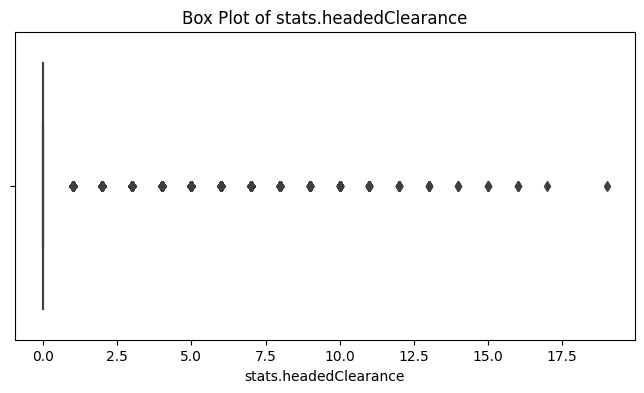

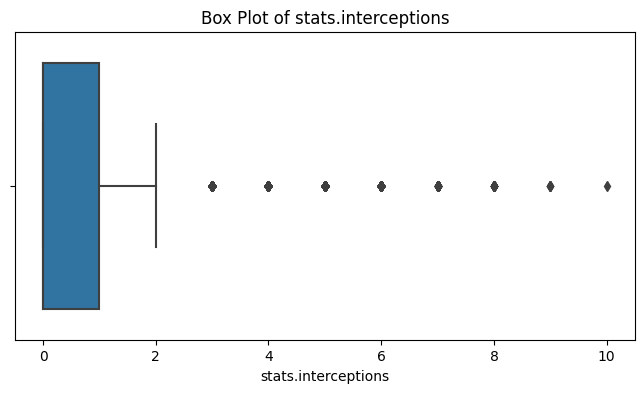

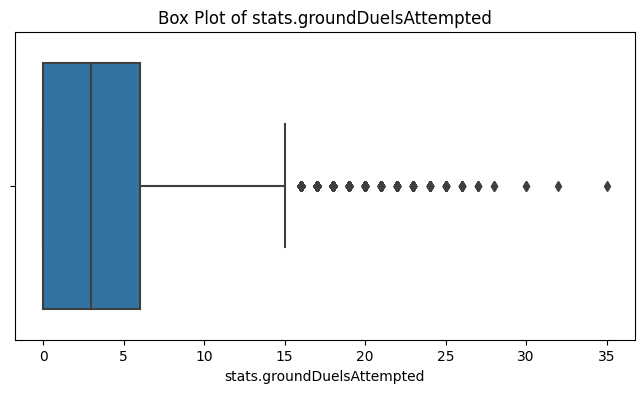

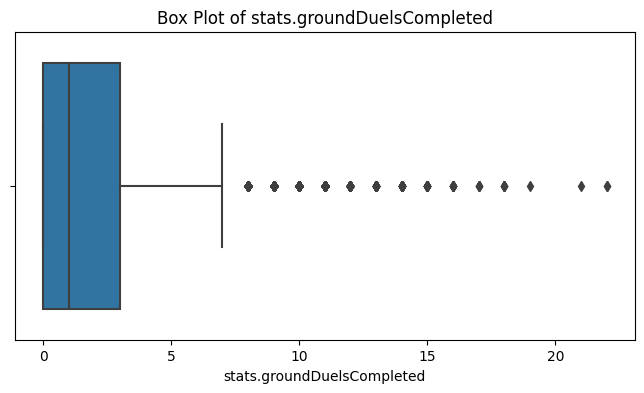

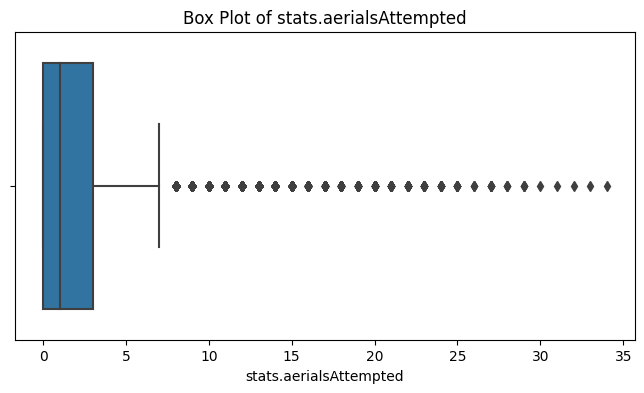

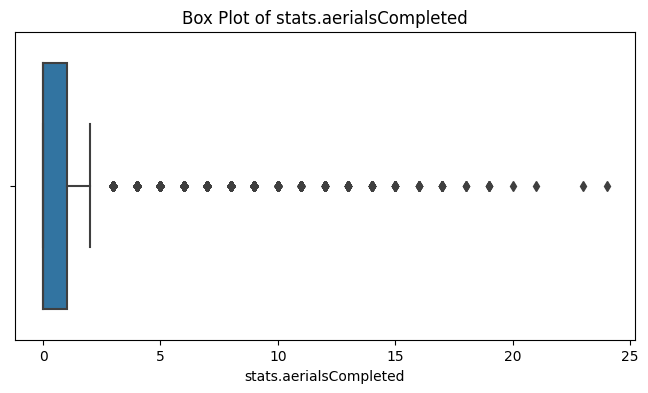

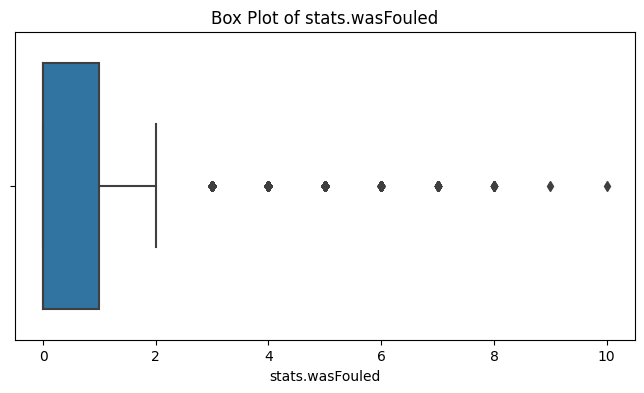

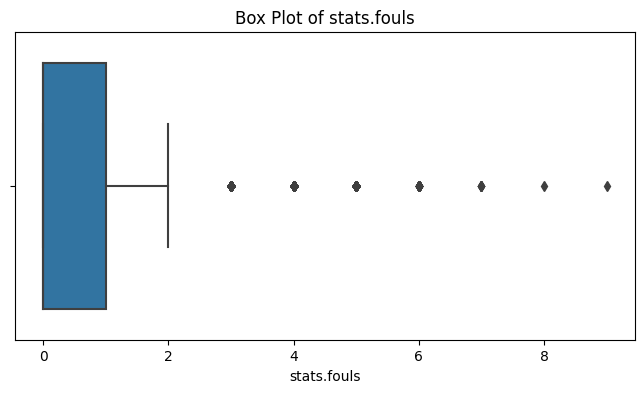

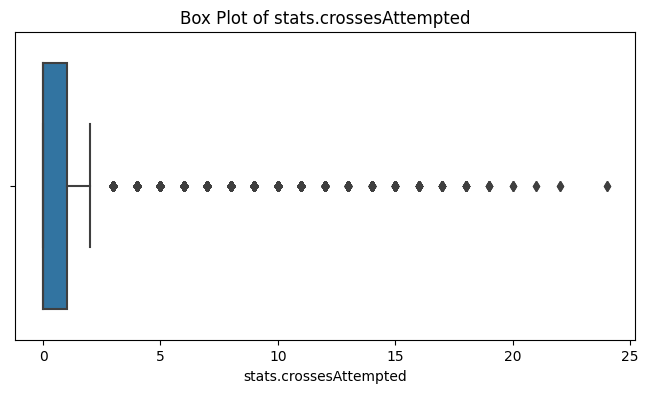

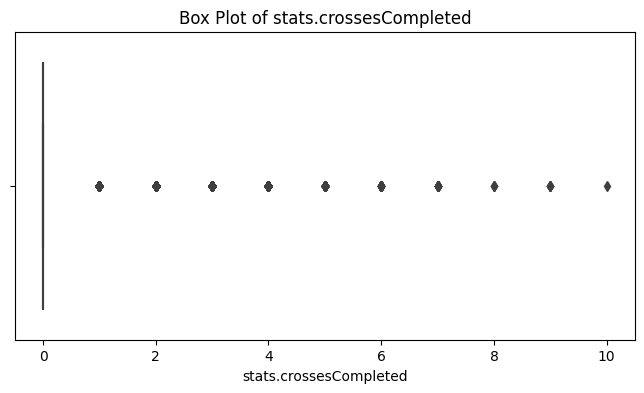

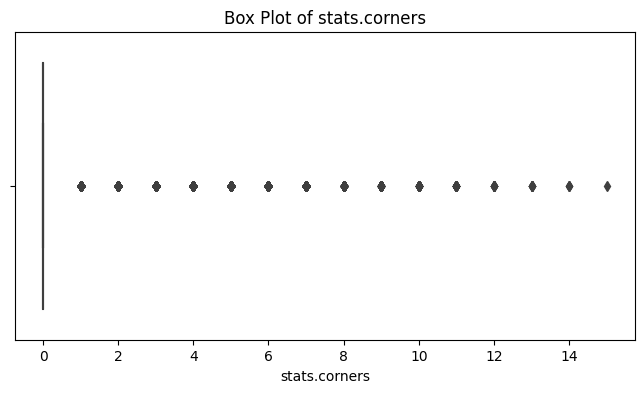

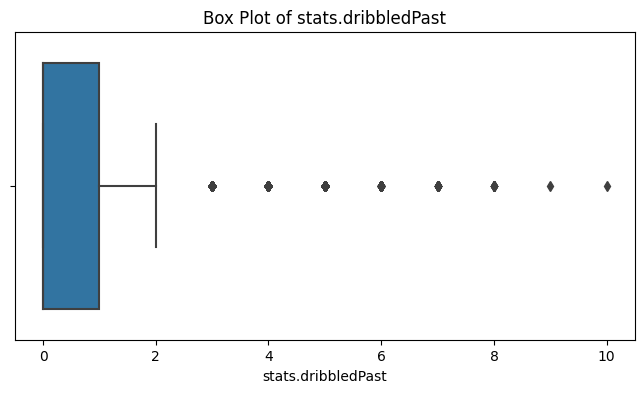

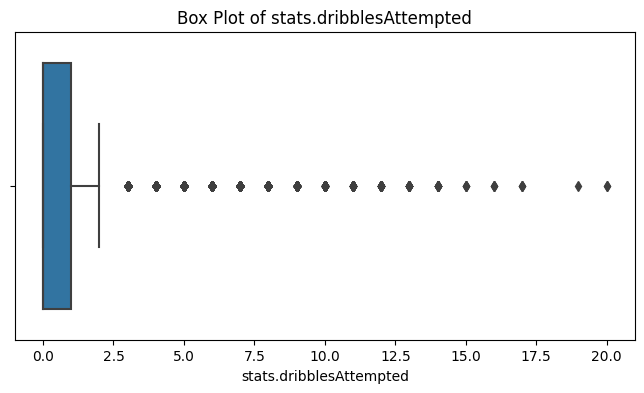

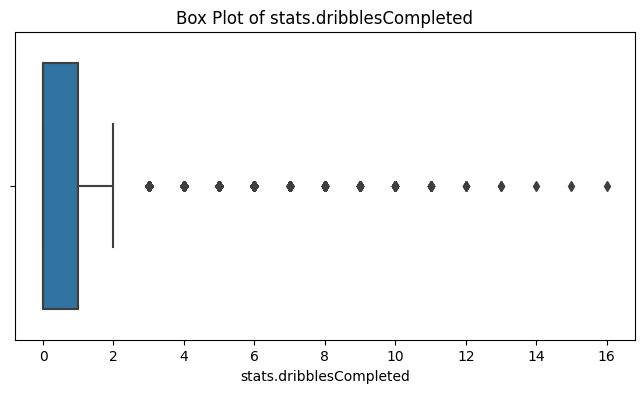

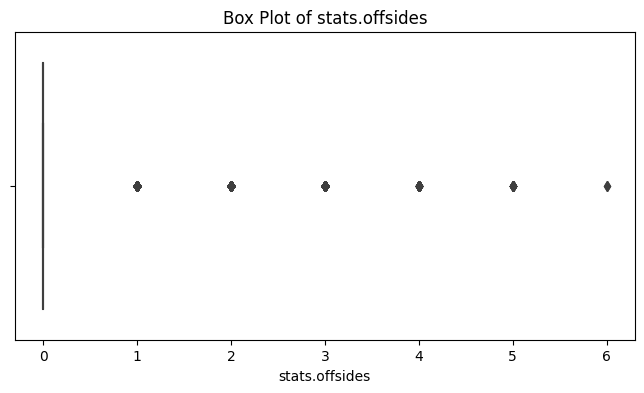

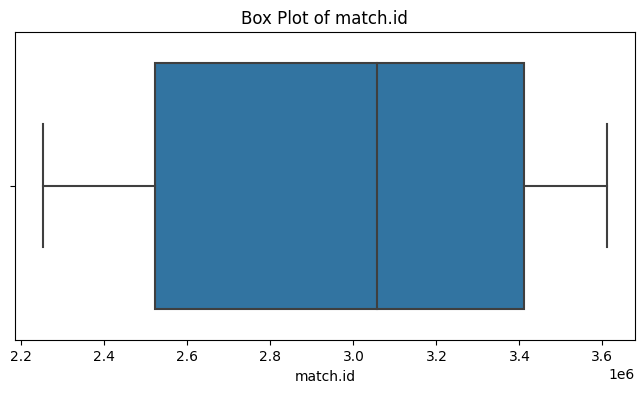

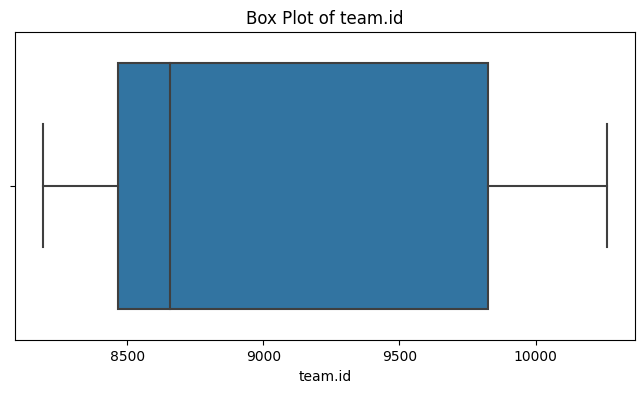

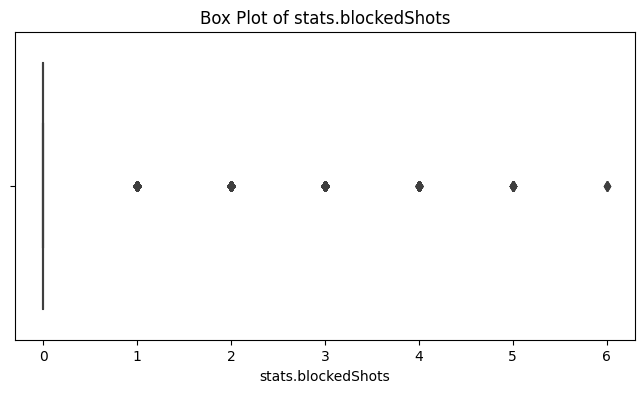

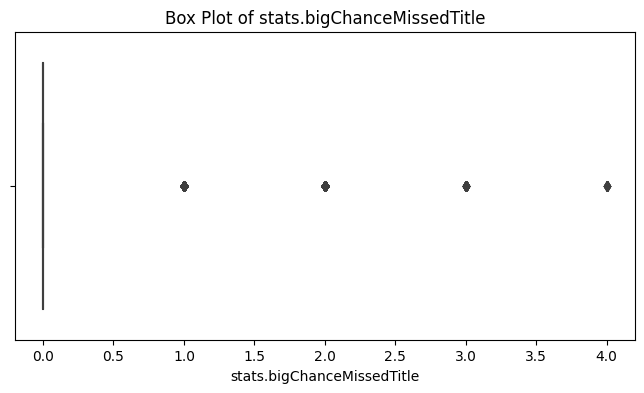

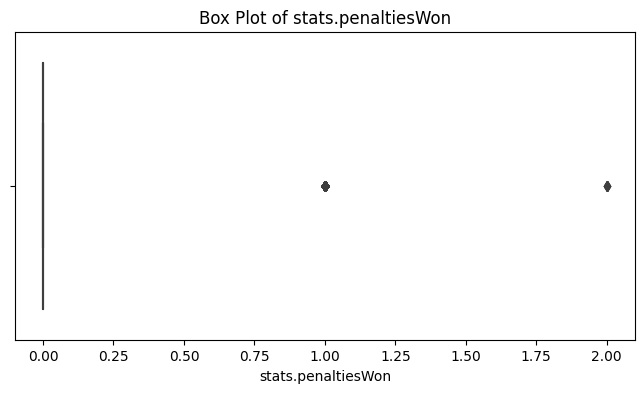

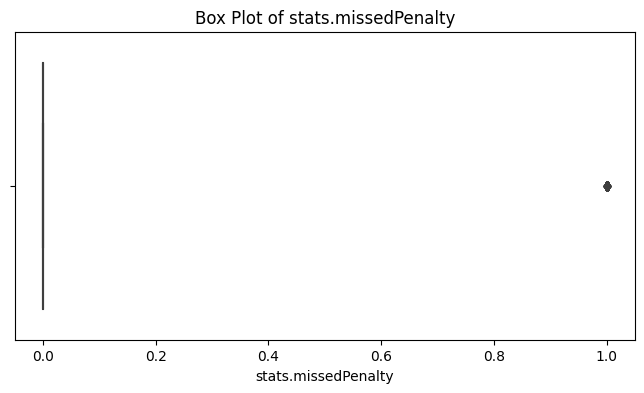

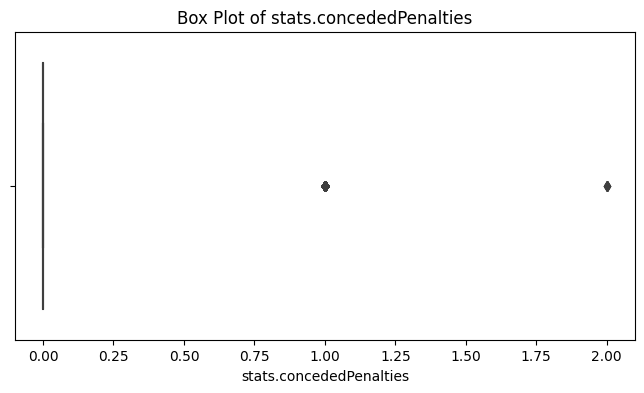

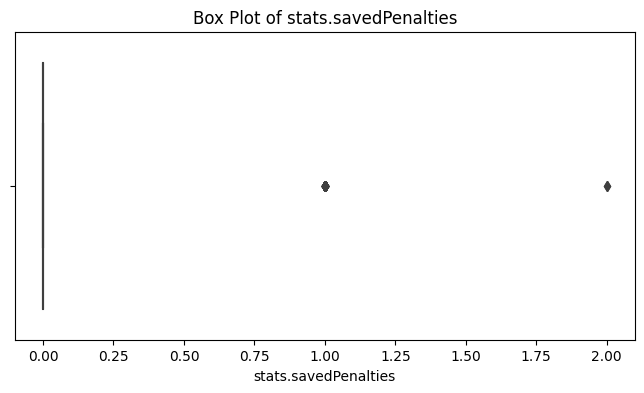

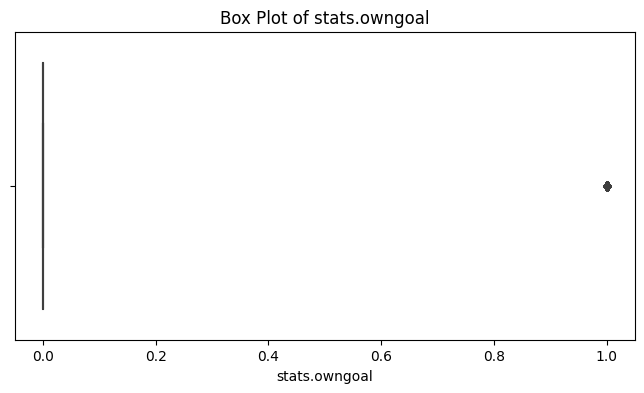

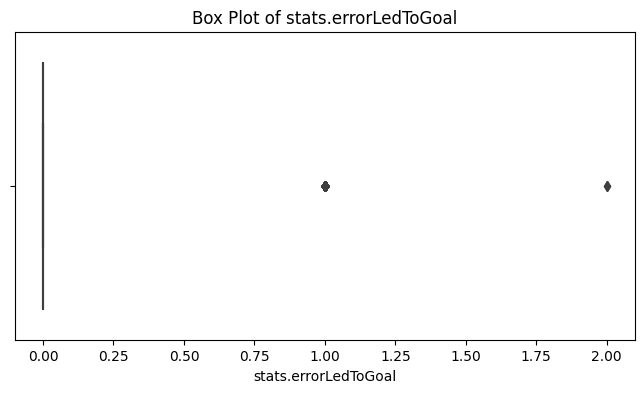

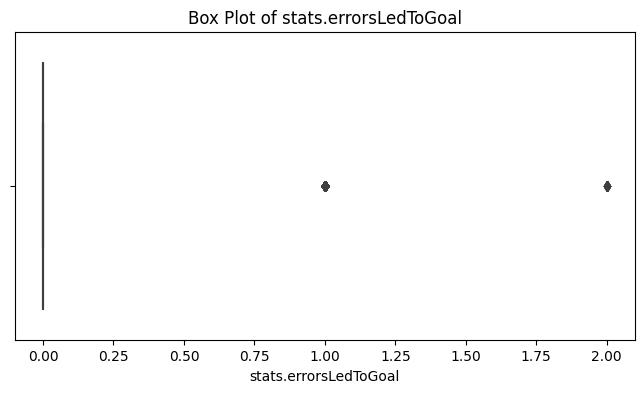

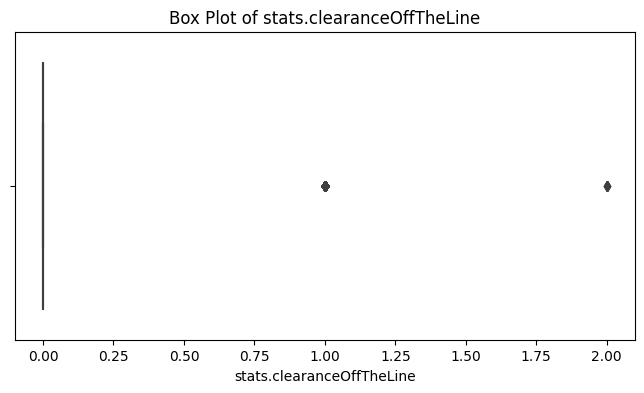

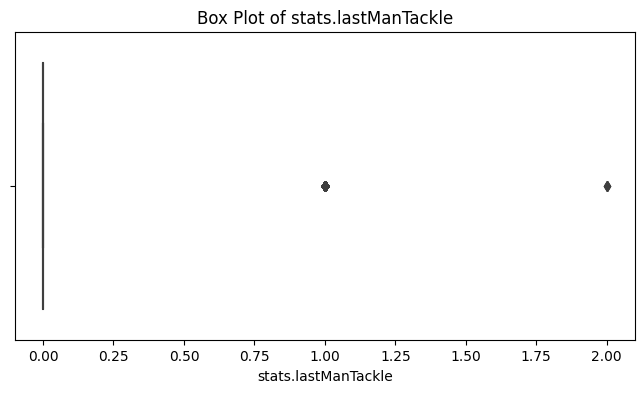

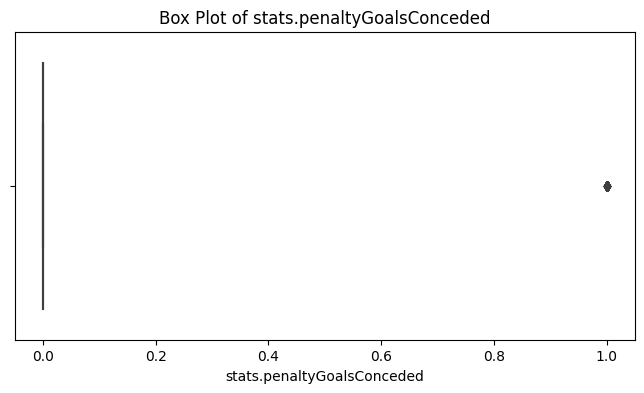

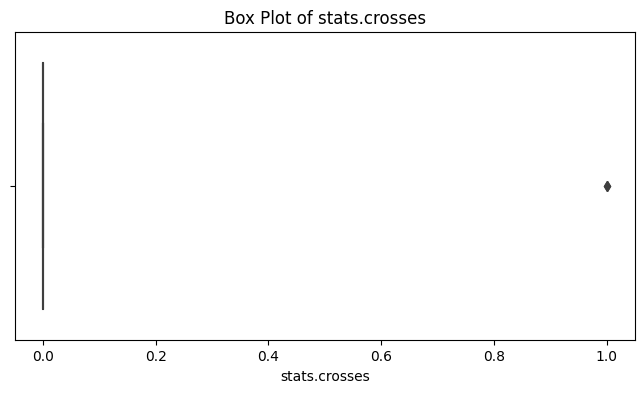

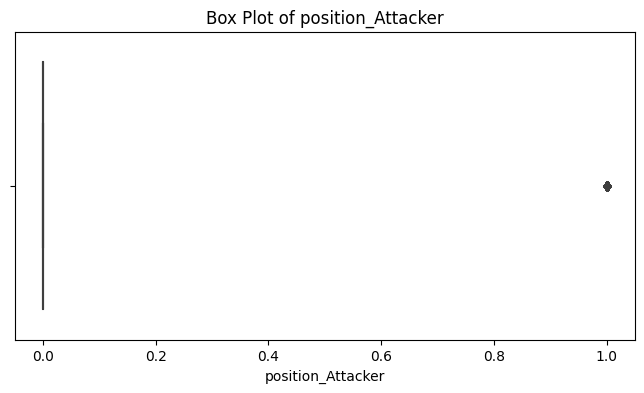

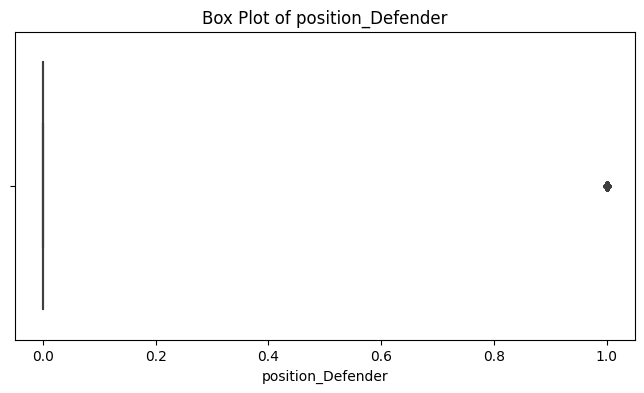

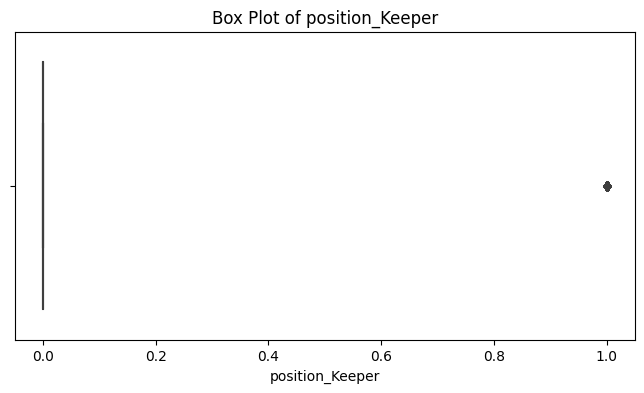

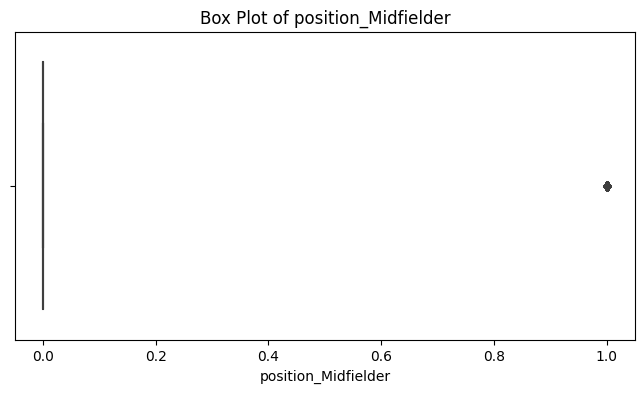

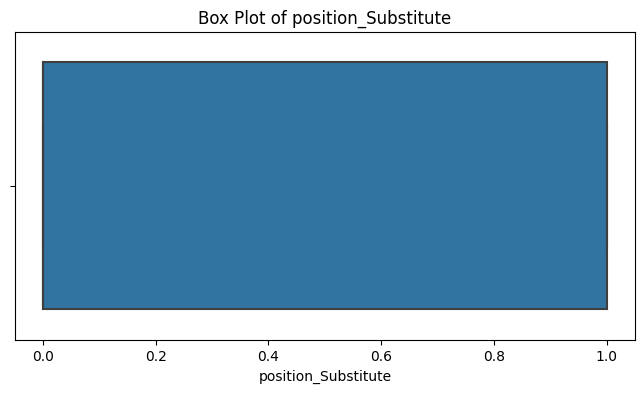

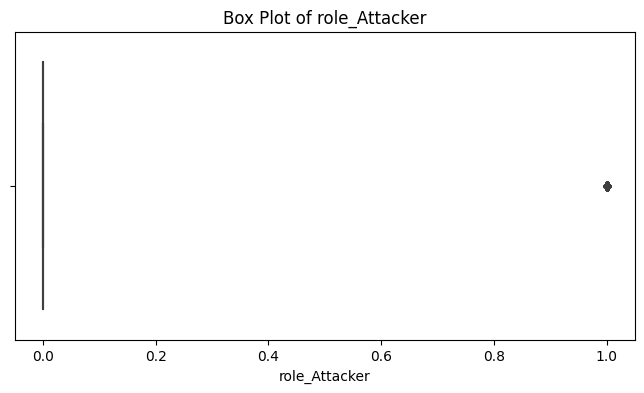

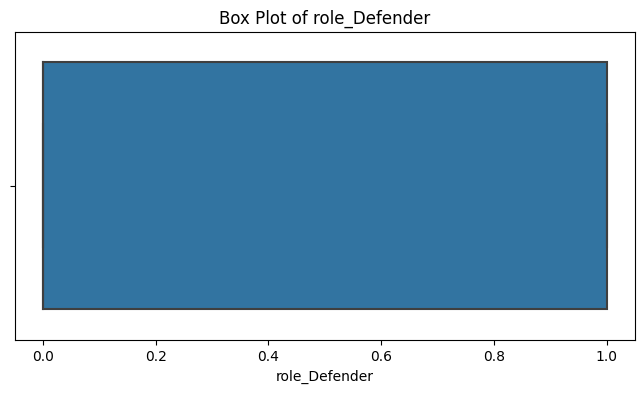

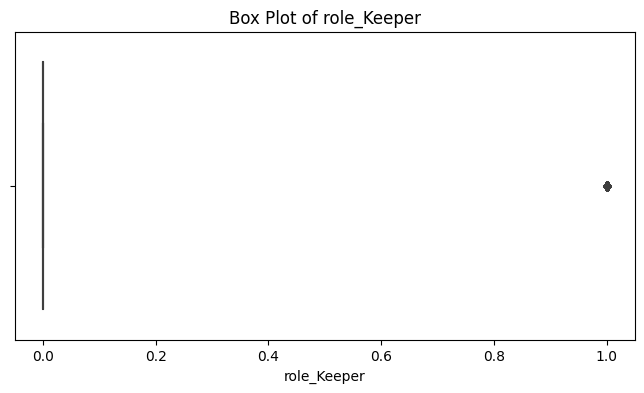

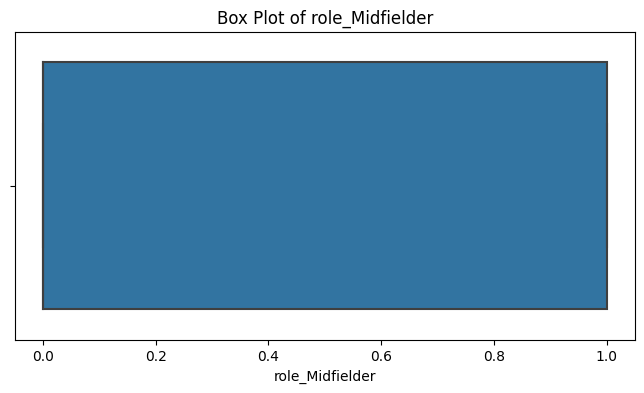

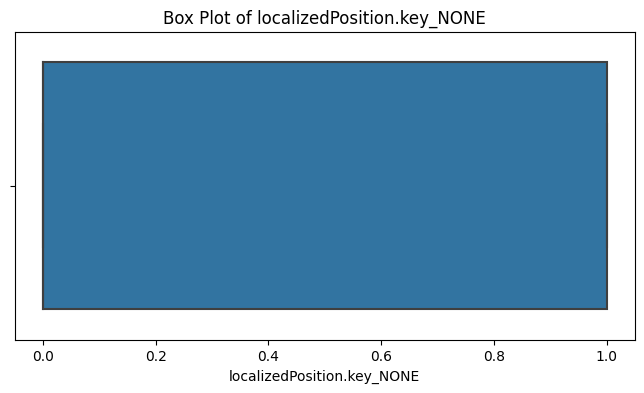

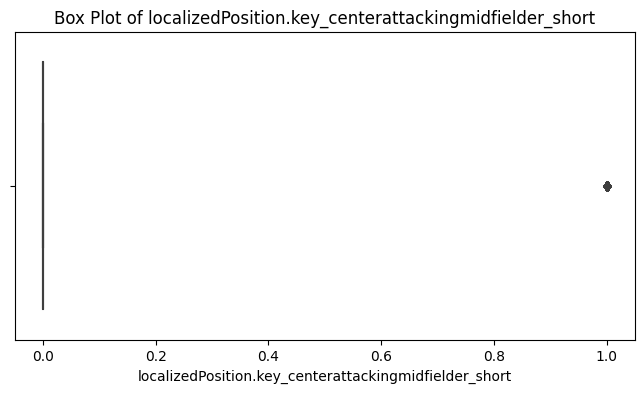

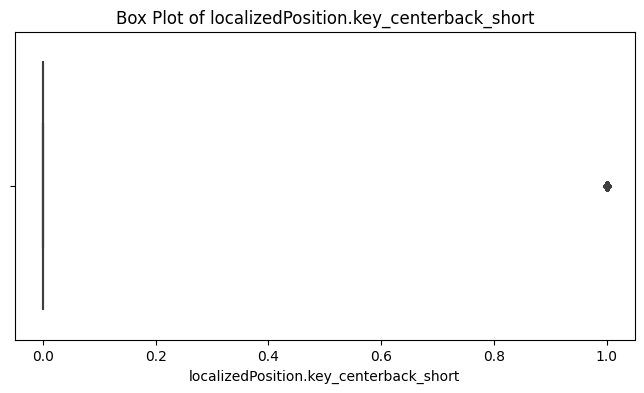

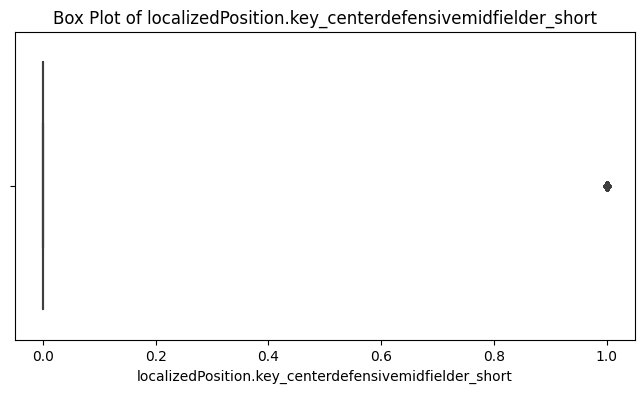

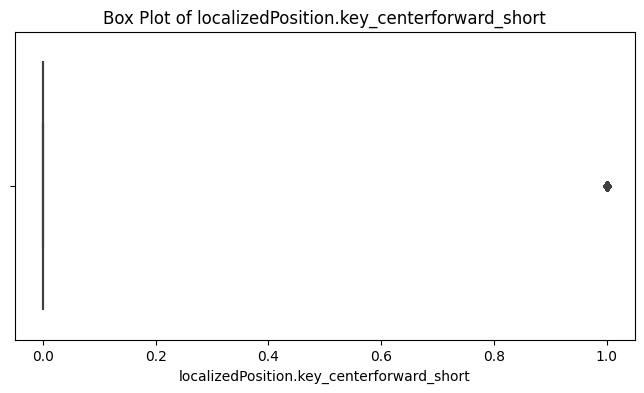

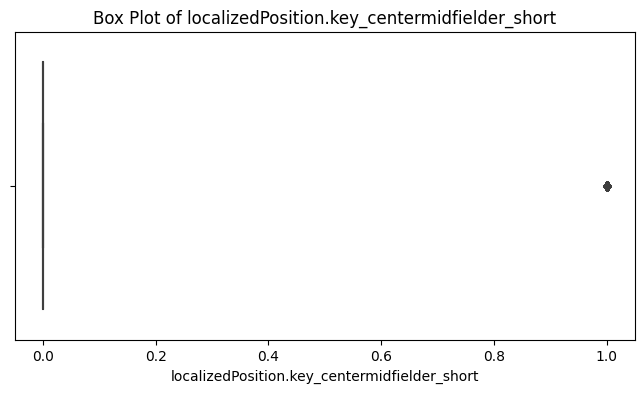

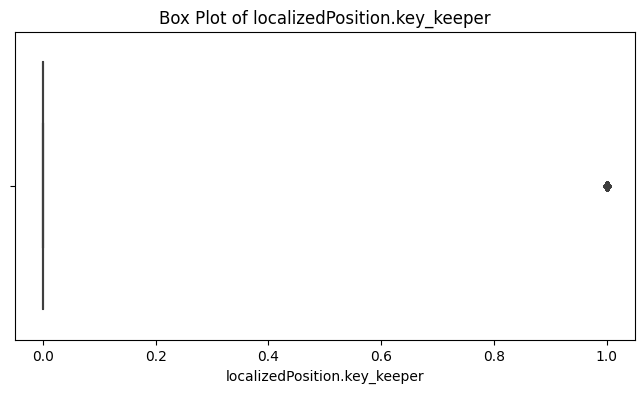

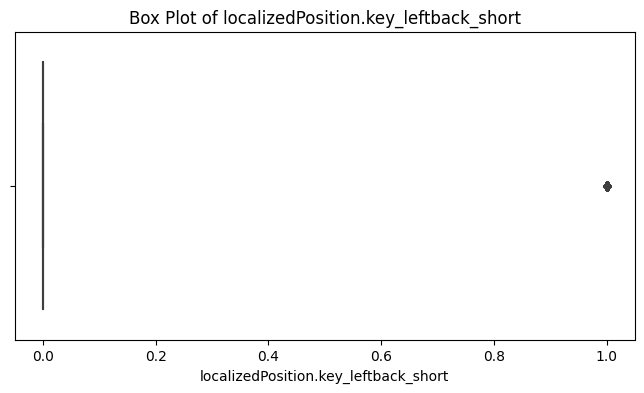

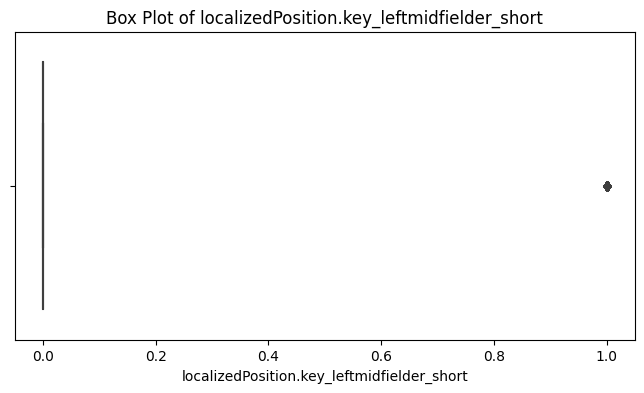

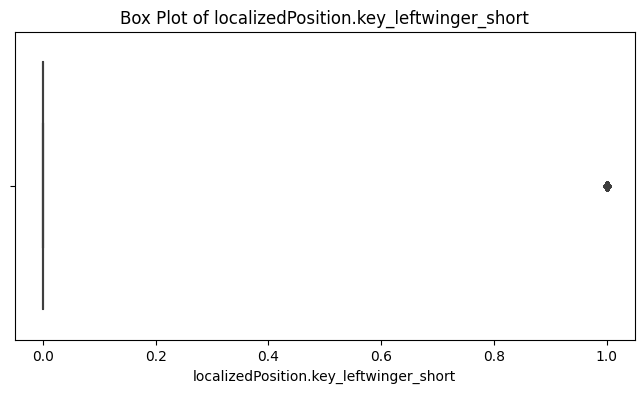

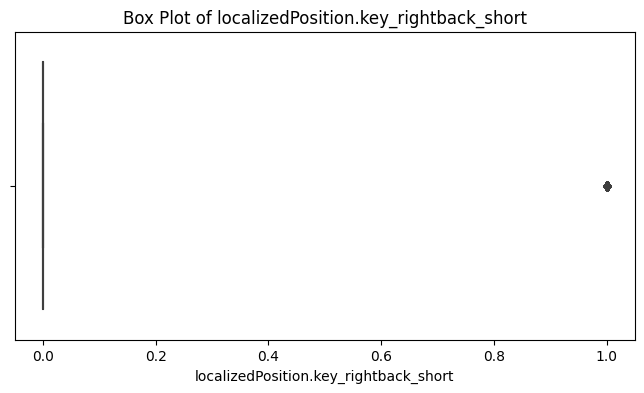

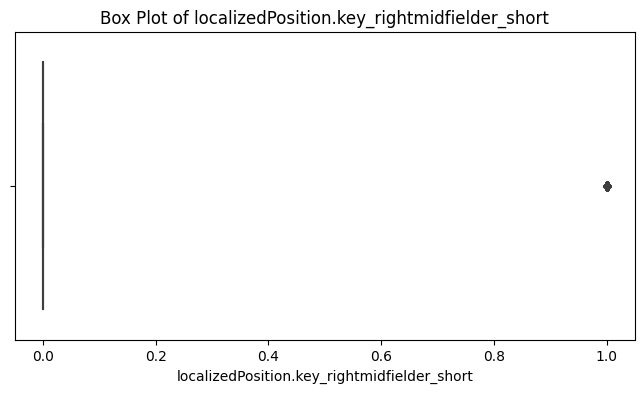

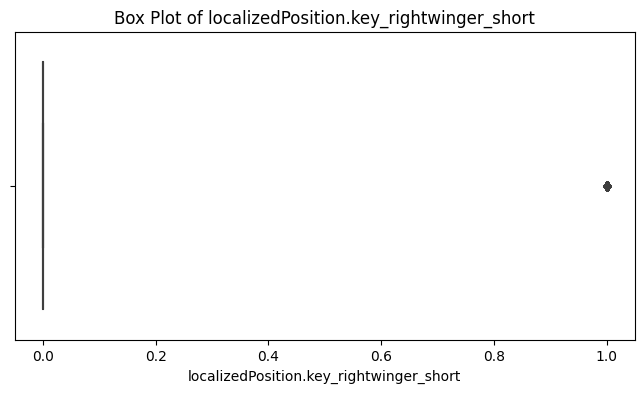

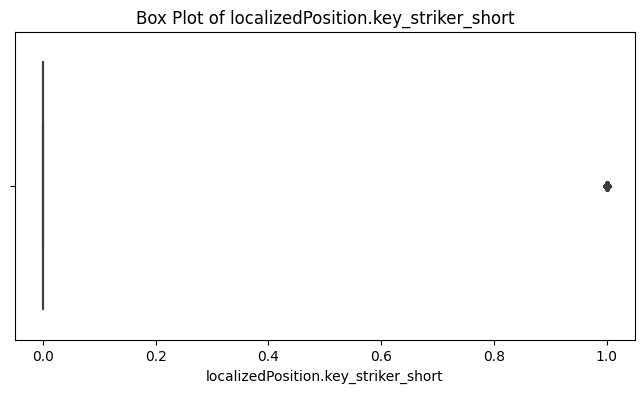

In [ ]:

#outlier analysis
numerical_columns = df.select_dtypes(include=['number'])

# Create a box plot for each numerical column
for column in numerical_columns.columns:
    plt.figure(figsize=(8, 4))  # Set the figure size
    sns.boxplot(x=numerical_columns[column])  # Create the box plot
    plt.title(f'Box Plot of {column}')  # Set the plot title
    plt.show()

#exploratory Data Analysis

<Axes: >

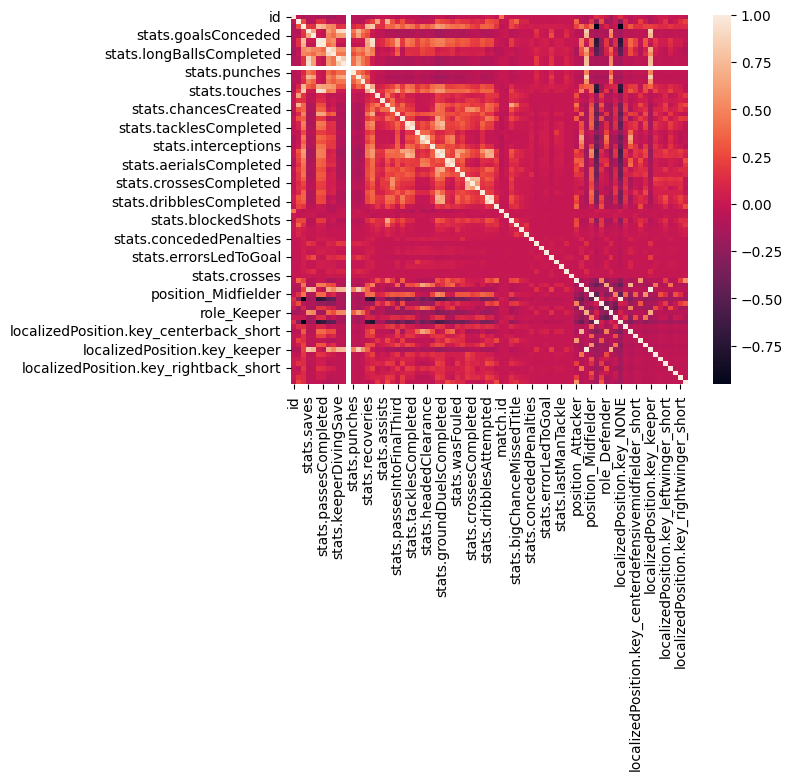

In [ ]:
# coorelation matrix
sns.heatmap(df.corr(numeric_only=True))